In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data and Data Preprocessing

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Renaming the relevant Column
data_cleaned = data[['v1', 'v2']].rename(columns={'v1': 'Label', 'v2': 'Message'})

In [4]:
data_cleaned.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df = data_cleaned

In [6]:
df.shape

(5572, 2)

In [7]:
# Setting Up My target Variable
# import Laber Encoder from Sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:
# Encode labels: 'ham' -> 0, 'spam' -> 1
encoder = LabelEncoder() # Make a variabele to enharit this function 
df['Target'] = encoder.fit_transform(df['Label'])
df.head(10)

,Label,Message,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [9]:
# Removing Punctuation Marks
df['Message'] = df['Message'].str.replace(r'[^\w\s]', '', regex=True)
df.head(10)

,Label,Message,Target
0,ham,Go until jurong point crazy Available only in ...,0
1,ham,Ok lar Joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor U c already then say,0
4,ham,Nah I dont think he goes to usf he lives aroun...,0
5,spam,FreeMsg Hey there darling its been 3 weeks now...,1
6,ham,Even my brother is not like to speak with me T...,0
7,ham,As per your request Melle Melle Oru Minnaminun...,0
8,spam,WINNER As a valued network customer you have b...,1
9,spam,Had your mobile 11 months or more U R entitled...,1


In [10]:
# Check for missing or duplicate data
missing_data = df.isnull().sum()
missing_data

Label      0
Message    0
Target     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
 2   Target   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [12]:
duplicates = df.duplicated().sum()
duplicates

np.int64(428)

In [13]:
# Renoving Duplicate
df = df.drop_duplicates(keep = 'first')
df.shape

(5144, 3)

## Exploratory Data Analysis (EDA)

In [16]:
print(df['Label'].value_counts())

Label
ham     4501
spam     643
Name: count, dtype: int64


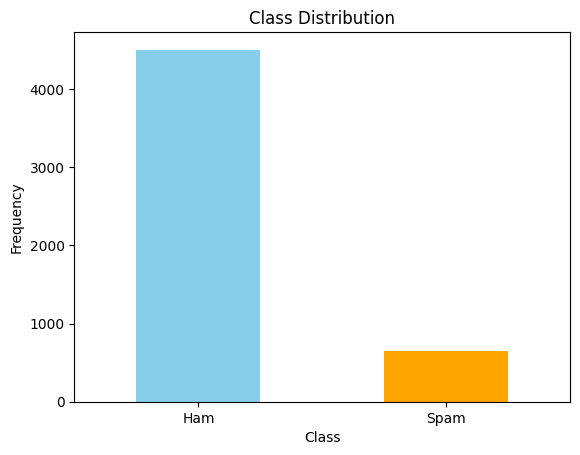

In [17]:
# Check class distribution
df['Label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.show()

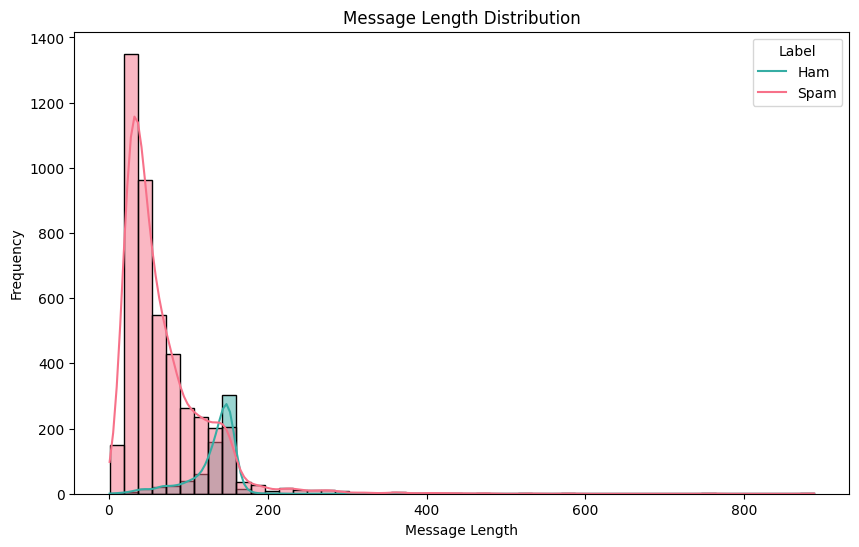

In [18]:
df['Message_Length'] = df['Message'].apply(len)

# Plot message lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Message_Length', hue='Label', bins=50, kde=True, palette='husl')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'], title='Label')
plt.show()

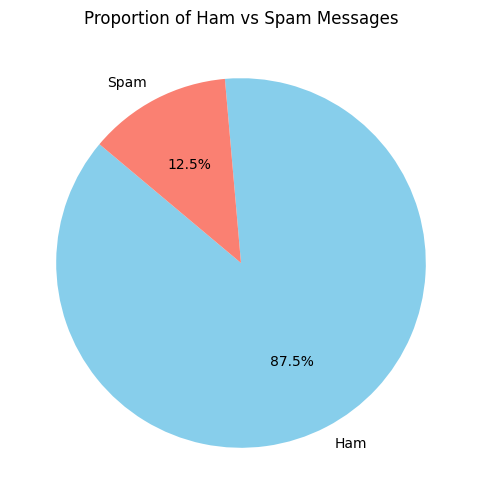

In [19]:
# Calculate proportions
class_counts = df['Label'].value_counts()
class_labels = ['Ham', 'Spam']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Proportion of Ham vs Spam Messages')
plt.show()

# Text Preprocessing

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
df['Message'] = df['Message'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words])
)

In [21]:
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['Message'] = df['Message'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])
)

In [22]:
df.head(10)

,Label,Message,Target,Message_Length
0,ham,Go jurong point crazy Available bugis n great ...,0,102
1,ham,Ok lar Joking wif u oni,0,23
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,1,149
3,ham,U dun say early hor U c already say,0,43
4,ham,Nah dont think go usf life around though,0,59
5,spam,FreeMsg Hey darling 3 week word back Id like f...,1,139
6,ham,Even brother like speak treat like aid patent,0,75
7,ham,per request Melle Melle Oru Minnaminunginte Nu...,0,154
8,spam,WINNER valued network customer selected receiv...,1,151
9,spam,mobile 11 month U R entitled Update latest col...,1,152


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform messages into TF-IDF features
X = vectorizer.fit_transform(df['Message']).toarray()
y = df['Target']

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4115, 5000)
Shape of X_test: (1029, 5000)
Shape of y_train: (4115,)
Shape of y_test: (1029,)


In [26]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 3601, 1: 514})
After SMOTE: Counter({0: 3601, 1: 3601})


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Naive Bayes
Accuracy: 0.9582118561710399
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       900
           1       0.78      0.92      0.85       129

    accuracy                           0.96      1029
   macro avg       0.89      0.94      0.91      1029
weighted avg       0.96      0.96      0.96      1029

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.967930029154519
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       900
           1       0.84      0.91      0.88       129

    accuracy                           0.97      1029
   macro avg       0.92      0.95      0.93      1029
weighted avg       0.97      0.97      0.97      1029

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9805636540330418
              precision    recall  f1-score   support

           0       0.98      1.00   

## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [32]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [33]:
# Evaluating tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))

Tuned Model Accuracy: 0.9795918367346939


## Model Deployment

In [34]:
import pickle

# Save model and vectorizer
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

In [35]:
# Load model and vectorizer
with open('spam_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)

In [36]:
# Testing the Model with a Message
new_message = ["Congratulations! You've won a $1,000 gift card. Click the link below to claim your prize: http://bit.ly/giftcard. Hurry, offer expires soon!"]
new_message_vectorized = loaded_vectorizer.transform(new_message)
prediction = loaded_model.predict(new_message_vectorized)
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")

Prediction: Spam
